We generate a neural network for a dataset 10 features. If we have three layers, the first with 64 nodes and the second and third with 32 nodes, how many parameters do we need to estimate?

In [ ]:
# 10 inputs (features)
# (num_inputs + bias) * num_nodes 

# first layer - 64 nodes
(10 + 1) * 64

704

In [ ]:
# second layer - 32 nodes
(64 + 1) * 32

2080

In [ ]:
# third layer - 32 nodes
(32 + 1) * 32

1056

In [ ]:
704 + 2080 + 1056

3840

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(64, input_dim=10)) # input_shape=(10,)
model.add(Dense(32))
model.add(Dense(32))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                704       
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_11 (Dense)             (None, 32)                1056      
Total params: 3,840
Trainable params: 3,840
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

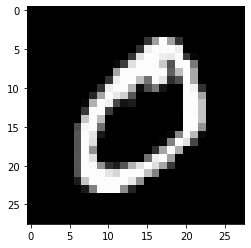

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[1], cmap='gray')

In [ ]:
y_train[1]

0

In [ ]:
input_dim = 784 # 28 * 28
output_dim = 10
batch_size = 128
nb_epoch = 20

X_train = X_train.reshape(60000, input_dim)
X_test = X_test.reshape(10000, input_dim)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# scaling our data to be between 0 and 1
X_train /= 255
X_test /= 255

In [ ]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [ ]:
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(y_train, output_dim)
Y_test = to_categorical(y_test, output_dim)

In [ ]:
Y_train[10]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
y_train[10]

3

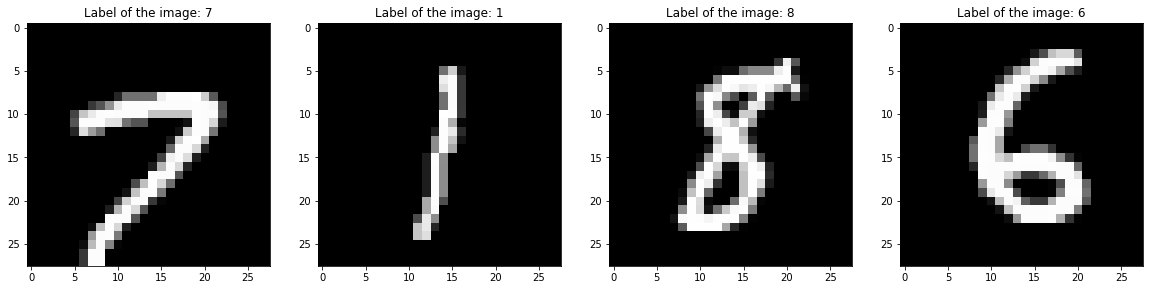

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))

plt.subplot(141)
plt.imshow(X_train[123].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y_train[123]))

plt.subplot(142)
plt.imshow(X_train[124].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y_train[124]))

plt.subplot(143)
plt.imshow(X_train[125].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y_train[125]))

plt.subplot(144)
plt.imshow(X_train[126].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y_train[126]))

plt.show()

In [ ]:
X_train.shape[1]

784

In [ ]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense

model = Sequential()

# first dense layer
model.add(Dense(1024, input_dim=X_train.shape[1], activation='relu')) # input_shape=(784,)
# second dense layer
model.add(Dense(1024, activation='relu'))
# third dense layer
model.add(Dense(1024, activation='relu'))

# output dense layer
model.add(Dense(10, activation='softmax')) # sigmoid for binary, softmax for multiclass

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1024)              803840    
_________________________________________________________________
dense_5 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_7 (Dense)              (None, 10)                10250     
Total params: 2,913,290
Trainable params: 2,913,290
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=batch_size, epochs=nb_epoch, verbose=1)

Epoch 1/20
469/469 [==============================] - 2s 4ms/step - loss: 1.1022 - accuracy: 0.7604 - val_loss: 0.4658 - val_accuracy: 0.8828
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.3984 - accuracy: 0.8920 - val_loss: 0.3264 - val_accuracy: 0.9095
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 0.3152 - accuracy: 0.9105 - val_loss: 0.2820 - val_accuracy: 0.9202
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2765 - accuracy: 0.9212 - val_loss: 0.2568 - val_accuracy: 0.9270
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2497 - accuracy: 0.9285 - val_loss: 0.2300 - val_accuracy: 0.9352
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2291 - accuracy: 0.9347 - val_loss: 0.2132 - val_accuracy: 0.9398
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2119 - accuracy: 0.9395 - val_loss: 0.2004 - val_accuracy: 0.9418
Epoch 

In [ ]:
import pandas as pd
df = pd.DataFrame(history.history)
df.head()

,loss,accuracy,val_loss,val_accuracy
0,1.094763,0.766433,0.460861,0.8847
1,0.392482,0.894350,0.323888,0.9120
2,0.312818,0.912683,0.282016,0.9216
3,0.275889,0.922333,0.250823,0.9308
4,0.250615,0.928900,0.233578,0.9349


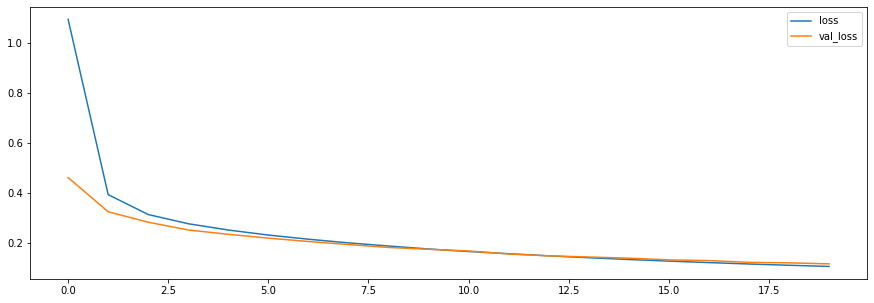

In [ ]:
df[['loss', 'val_loss']].plot(figsize=(15,5))

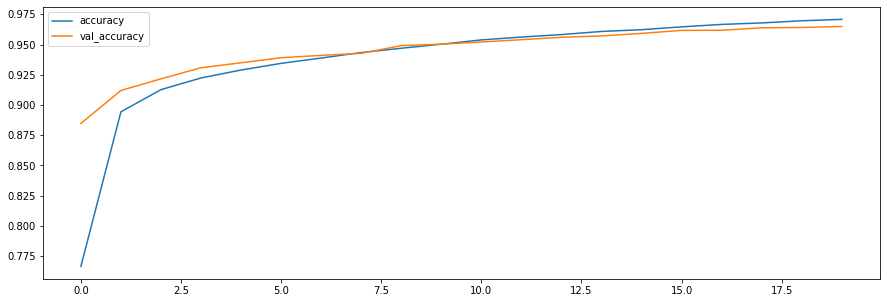

In [ ]:
df[['accuracy', 'val_accuracy']].plot(figsize=(15,5))

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test Loss:', score[0])
print('Test Acc:', score[1])

Test Loss: 0.11234497278928757
Test Acc: 0.9674999713897705


In [ ]:
y_test[3]

0

In [ ]:
model.predict(X_test)[3]
# [0,0,0,0,0,0,0,0,0,0]
# probabilities range 0-1


array([9.9960357e-01, 1.8791022e-07, 1.7525895e-04, 4.3394125e-06,
       3.1757466e-07, 8.7108365e-06, 9.5531388e-05, 8.4655490e-05,
       4.2016234e-07, 2.6945223e-05], dtype=float32)

In [ ]:
2.6945223e-05

2.6945223e-05

In [ ]:
model.predict_classes(X_test)[3]

0

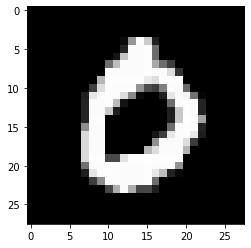

In [ ]:
plt.imshow(X_test[3].reshape(28,28), cmap='gray')